# Project A - Q3 ANN Multilayer Perceptron (Patient Drug Dataset)

This code was used for the classification tasks described in Question 3 of Project A. The classifications of both Patient drug data set and Telecommunications data set were conducted using this code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from tools import plot_confusion_matrix

import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt

#Read the csv from C:\
my_data = pd.read_csv("projecta/drug_csv.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
# X value with all the features except the target drug field
#y is the target drug field that is to be prediced by the model.
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [3]:
#Pre processing
#Convert string values into equivalent numeric
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [4]:
#Create a dictionary for y
drug = {'drugA': 1,'drugB':2,'drugC':3,'drugX':4,'drugY': 5} 
class_names = ['drugA','drugB','drugC','drugX','drugY']

In [5]:
#Replace the drug with numeric
my_data.Drug=[drug[item] for item in my_data.Drug]
y_enc=my_data[['Drug']].values

In [6]:
y = np.zeros((len(X),5))
for i in range(0, len(X)): y[i,y_enc[i]-1] = 1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Split  the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(160, 5) (160, 5)
(40, 5) (40, 5)


In [41]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 5])
y_ = tf.placeholder(tf.float32, [None, 5])

neur = 200

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([5, neur]))
layer_0_bias = tf.Variable(tf.random_normal([neur]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))


# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_1_bias = tf.Variable(tf.random_normal([neur]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))


"""
# Create second layer weights
layer_2_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_2_bias = tf.Variable(tf.random_normal([neur]))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))
"""

# Create third layer weights
layer_3_weights = tf.Variable(tf.random_normal([neur, 5]))
layer_3_bias = tf.Variable(tf.random_normal([5]))
layer_3 = tf.nn.softmax(tf.add(tf.matmul(layer_1, layer_3_weights), layer_3_bias))

Training...


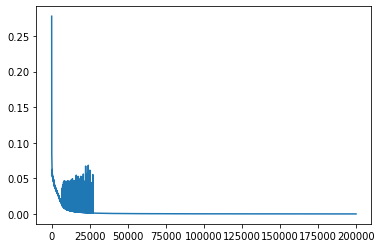

In [75]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_3))

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1).minimize(cost)

N_EPOCHS = 200000 #Increase the number of epochs to about 50000 to get better results. This will take some time for training.

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: X_train, y_: y_train})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

In [87]:
# Display predictions
classifications2 = round(sess.run(layer_3, feed_dict={x_: X_train}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)
classifications2[0:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [88]:
def label_dencode(label):
    val= []
    if np.where(label == 1)[0]==0:
        val = 1.0
    elif np.where(label == 1)[0]==1:
        val = 2.0
    elif np.where(label == 1)[0]==2:
        val = 3.0
    elif np.where(label == 1)[0]==3:
        val = 4.0
    elif np.where(label == 1)[0]==4:
        val = 5.0
    else: val = 0.0
    return val



In [89]:
class2 = list(np.zeros(len(classifications2))) 
for i in range(0, len(class2)): class2[i]=int(label_dencode(classifications2[i]))

y2 = list(np.zeros(len(y_train)))           
for i in range(0, len(y2)): y2[i]=int(label_dencode(round(y_train[i])))


In [90]:
confusion_matrix = np.zeros((len(class_names)+1, len(class_names)+1))

for true_label, predicted_label in zip(y2, class2):    
    confusion_matrix[true_label][predicted_label] += 1
    print(true_label, predicted_label,confusion_matrix[true_label][predicted_label])
    
confusion_matrix = confusion_matrix[1:6,1:6]

5 5 1.0
5 5 2.0
5 5 3.0
3 3 1.0
5 5 4.0
5 5 5.0
5 5 6.0
4 4 1.0
5 5 7.0
5 5 8.0
1 1 1.0
5 5 9.0
4 4 2.0
5 5 10.0
3 3 2.0
5 5 11.0
5 5 12.0
5 5 13.0
3 3 3.0
5 5 14.0
5 5 15.0
4 4 3.0
4 4 4.0
1 1 2.0
4 4 5.0
5 5 16.0
5 5 17.0
4 4 6.0
5 5 18.0
5 5 19.0
5 5 20.0
2 2 1.0
4 4 7.0
3 3 4.0
1 1 3.0
1 1 4.0
2 2 2.0
5 5 21.0
1 1 5.0
4 4 8.0
5 5 22.0
5 5 23.0
5 5 24.0
5 5 25.0
4 4 9.0
4 4 10.0
5 5 26.0
5 5 27.0
5 5 28.0
1 1 6.0
5 5 29.0
2 2 3.0
5 5 30.0
4 4 11.0
5 5 31.0
1 1 7.0
4 4 12.0
3 3 5.0
3 3 6.0
1 1 8.0
5 5 32.0
5 5 33.0
4 4 13.0
4 4 14.0
5 5 34.0
5 5 35.0
4 4 15.0
1 1 9.0
4 4 16.0
2 2 4.0
1 1 10.0
4 4 17.0
5 5 36.0
4 4 18.0
4 4 19.0
3 3 7.0
2 2 5.0
5 5 37.0
4 4 20.0
5 5 38.0
5 5 39.0
2 2 6.0
4 4 21.0
5 5 40.0
5 5 41.0
5 5 42.0
5 5 43.0
5 5 44.0
1 1 11.0
5 5 45.0
2 2 7.0
4 4 22.0
4 4 23.0
1 1 12.0
4 4 24.0
5 5 46.0
2 2 8.0
5 5 47.0
4 4 25.0
5 5 48.0
4 4 26.0
5 5 49.0
5 5 50.0
1 1 13.0
4 4 27.0
2 2 9.0
4 4 28.0
5 5 51.0
5 5 52.0
5 5 53.0
5 5 54.0
4 4 29.0
2 2 10.0
5 5 55.0
4 4 30.0
3 3 8.0


In [91]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], classes)

    #fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[17.  0.  0.  0.  0.]
 [ 0. 13.  0.  0.  0.]
 [ 0.  0. 11.  0.  0.]
 [ 0.  0.  0. 43.  0.]
 [ 0.  0.  0.  0. 76.]]
Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


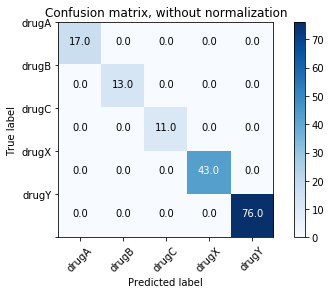

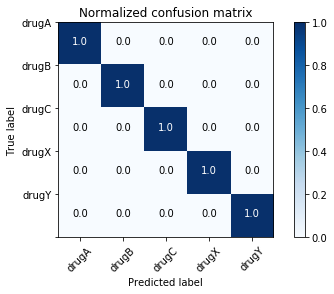

In [92]:
#from tools import plot_confusion_matrix


plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['drugA','drugB','drugC','drugX','drugY'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['drugA','drugB','drugC','drugX','drugY'], normalize=True, title='Normalized confusion matrix')

plt.show()

Crossvalidation with test dataset

In [93]:
# Display predictions
classificationsTest = round(sess.run(layer_3, feed_dict={x_: X_test}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)
classificationsTest[0:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [94]:
class2 = list(np.zeros(len(classificationsTest))) 
for i in range(0, len(class2)): class2[i]=int(label_dencode(classificationsTest[i]))

y2 = list(np.zeros(len(y_test)))           
for i in range(0, len(y2)): y2[i]=int(label_dencode(round(y_test[i])))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous

In [95]:
confusion_matrix = np.zeros((len(class_names)+1, len(class_names)+1))

for true_label, predicted_label in zip(y2, class2):    
    confusion_matrix[true_label][predicted_label] += 1
    print(true_label, predicted_label,confusion_matrix[true_label][predicted_label])
    
#confusion_matrix = confusion_matrix[1:6,1:6]

5 5 1.0
5 5 2.0
5 5 3.0
5 5 4.0
3 5 1.0
4 4 1.0
5 5 5.0
5 5 6.0
5 5 7.0
1 0 1.0
1 1 1.0
4 4 2.0
1 1 2.0
5 5 8.0
5 5 9.0
5 5 10.0
5 5 11.0
4 4 3.0
2 1 1.0
3 3 1.0
4 4 4.0
3 3 2.0
1 5 1.0
4 5 1.0
3 3 3.0
2 2 1.0
4 4 5.0
5 5 12.0
4 4 6.0
5 5 13.0
2 2 2.0
3 3 4.0
4 4 7.0
4 4 8.0
4 4 9.0
5 5 14.0
1 1 3.0
1 1 4.0
4 4 10.0
5 5 15.0


Confusion matrix, without normalization
[[ 4.  0.  0.  0.  1.]
 [ 1.  2.  0.  0.  0.]
 [ 0.  0.  4.  0.  1.]
 [ 0.  0.  0. 10.  1.]
 [ 0.  0.  0.  0. 15.]]
Normalized confusion matrix
[[0.8        0.         0.         0.         0.2       ]
 [0.33333333 0.66666667 0.         0.         0.        ]
 [0.         0.         0.8        0.         0.2       ]
 [0.         0.         0.         0.90909091 0.09090909]
 [0.         0.         0.         0.         1.        ]]


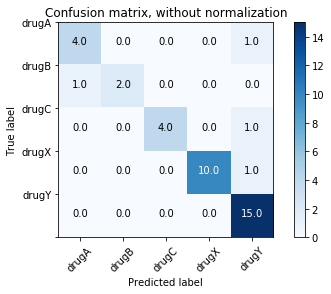

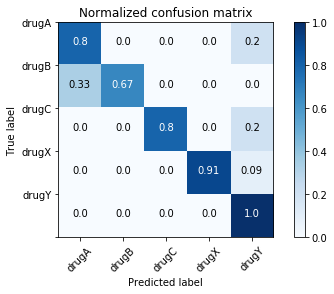

In [96]:
#from tools import plot_confusion_matrix


plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['drugA','drugB','drugC','drugX','drugY'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['drugA','drugB','drugC','drugX','drugY'], normalize=True, title='Normalized confusion matrix')

plt.show()